# Preprocess Data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("resources/stroke-data.csv")

In [3]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

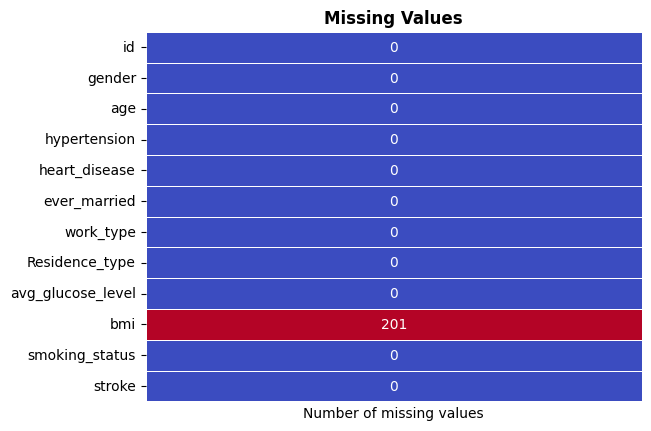

In [5]:
plt.title('Missing Values', fontweight='bold')
ax = sns.heatmap(df.isna().sum().to_frame(), annot=True, fmt='d', cmap='coolwarm', linewidths=0.5, cbar=False)
ax.set_xlabel('Number of missing values')
ax.set_xticks([])
plt.show()

## Fill gaps

In [6]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
import numpy as np

In [7]:
DTR_bmi_pipe = Pipeline(steps=[('scaler', StandardScaler()), ('DTR', DecisionTreeRegressor(random_state=42))])
X_bmi = df[['age','gender','bmi']].copy()
X_bmi.gender = X_bmi.gender.replace({'Male': 0,'Female': 1,'Other': -1}).astype(np.uint8)

X_with_missing_bmis = X_bmi[x_bmi.bmi.isna()]
X_bmi = X_bmi[~X_bmi.bmi.isna()]
y_bmi = X_bmi.pop('bmi')
DTR_bmi_pipe.fit(X_bmi, y_bmi)
predicted_bmis = pd.Series(DTR_bmi_pipe.predict(X_with_missing_bmis[['age','gender']]), index=X_with_missing_bmis.index)
df.loc[X_with_missing_bmis.index, 'bmi'] = predicted_bmis

In [8]:
print('Overall number of missing values: ', sum(df.isnull().sum()))

Overall number of missing values:  0


# Model preparation

## Encode categorical values

In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
df['smoking_status'] = LabelEncoder().fit_transform(df['smoking_status'])
df['ever_married'] = LabelEncoder().fit_transform(df['ever_married'])
df['work_type'] = LabelEncoder().fit_transform(df['work_type'])
df['Residence_type'] = LabelEncoder().fit_transform(df['Residence_type'])
df['gender'] = LabelEncoder().fit_transform(df['gender'])

In [11]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,51676,0,61.0,0,0,1,3,0,202.21,29.879487,2,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,60182,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,1665,0,79.0,1,0,1,3,0,174.12,24.000000,2,1


## Split dataset into train and test sets

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
y = df['stroke']
X = df.drop(columns=['stroke'])

X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.2, random_state=42)

## Balance dataset

In [14]:
from imblearn.over_sampling import SMOTE

In [16]:
samler = SMOTE(sampling_strategy='minority')
x_train_smt, y_train_smt = smote_technique.fit_resample(x_train, y_train)

In [17]:
x_train_smt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1958 entries, 0 to 1957
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 1958 non-null   int64  
 1   gender             1958 non-null   int32  
 2   age                1958 non-null   float64
 3   hypertension       1958 non-null   int64  
 4   heart_disease      1958 non-null   int64  
 5   ever_married       1958 non-null   int32  
 6   work_type          1958 non-null   int32  
 7   Residence_type     1958 non-null   int32  
 8   avg_glucose_level  1958 non-null   float64
 9   bmi                1958 non-null   float64
 10  smoking_status     1958 non-null   int32  
dtypes: float64(3), int32(5), int64(3)
memory usage: 130.1 KB


In [ ]:
sns.countplot(x=y_train_resampled)